# Инициализация

In [0]:
#@markdown - **Монтирование GoogleDrive** 
from google.colab import drive
drive.mount('GoogleDrive')

In [0]:
# #@markdown - **Размонтирование**
# !fusermount -u GoogleDrive

# Область кодов

In [0]:
!pip install hmmlearn

     |████████████████████████████████| 153kB 5.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/2c/b6/0e/63a865a30e21e01d04f417d8995fbfb793d6bd464707efc546
Successfully built hmmlearn


In [0]:
#@title Скрытая марковская модель { display-mode: "both" }
# В программе реализована кластеризация случайных данных при использовании API GaussianHMM в hmmlearn
# Модель также может быть использована для классификации, разница заключается в том:
# при задачи кластеризации все образцы используются для одной модели, и при задачи классификации каждый класс имеет свою собственную независимую модель
#@markdown [hmmlearn API Reference](https://hmmlearn.readthedocs.io/en/latest/api.html#hmmlearn-hmm)
# Hidden Markov Model
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D




In [0]:
#@markdown - **Привязка данных**
class Bunch(dict):  
	def __init__(self,*args,**kwds):  
		super(Bunch,self).__init__(*args,**kwds)  
		self.__dict__ = self

In [0]:
# #@markdown - **Генерация стохастических данных**
# def generate_random(N, mu, sigma):  
# 	return np.random.multivariate_normal(mu, sigma, N)

In [0]:
#@markdown - **Генерация стохастических данных с этикетками**
def generate_random(sigma, N, mu1=[15., 25., 10], mu2=[30., 40., 30], mu3=[25., 10., 20], mu4=[40., 30., 40]):  
	c = sigma.shape[-1]
	X = np.zeros((N, c))
	target = np.zeros((N,1))
	for i in range(N):  
		if np.random.random(1) < 0.25:
			X[i, :]  = np.random.multivariate_normal(mu1, sigma[0, :, :], 1)     # первая гауссовская модель  
			target[i] = 0
		elif 0.25 <= np.random.random(1) < 0.5:  
			X[i, :] = np.random.multivariate_normal(mu2, sigma[1, :, :], 1)      # вторая гауссовская модель  
			target[i] = 1
		elif 0.5 <= np.random.random(1) < 0.75:  
			X[i, :] = np.random.multivariate_normal(mu3, sigma[2, :, :], 1)      # третья гауссовская модель  
			target[i] = 2
		else:  
			X[i, :] = np.random.multivariate_normal(mu4, sigma[3, :, :], 1)      # четвертая гауссовская модель  
			target[i] = 3
	return X, target

In [0]:
#@markdown - **Стохастические данные**
k, N = 4, 400
sigma = np.zeros((k, 3, 3))
for i in range(k):
	sigma[i, :, :] = np.diag(np.random.randint(10, 25, size=(3, )))
sample, target = generate_random(sigma, N)
feature_names = ['x_label', 'y_label', 'z_label']
target_names = ['gaussian1', 'gaussian2', 'gaussian3', 'gaussian4']
data = Bunch(sample=sample, feature_names=feature_names, target=target, target_names=target_names)
sample_t, target_t = generate_random(sigma, N)
data_t = Bunch(sample=sample_t, target=target_t)

In [0]:
#@markdown - **Обучение модели**
model = hmm.GaussianHMM(n_components=4,covariance_type='tied')
model.fit(data.sample)

GaussianHMM(algorithm='viterbi', covariance_type='tied', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=4, n_iter=10, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [0]:
target_train = data.target.flatten().astype('int32')
target_pre = model.predict(data.sample).astype('int32')

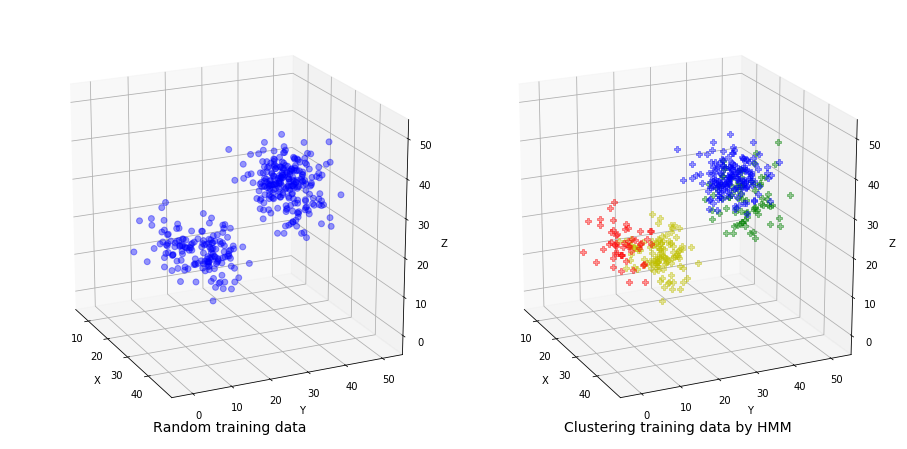

In [0]:
#@markdown - **Представление результата кластеризации обучающих данных методом СММ**
titles = ['Random training data', 'Clustering training data by HMM']
TAR = [target_train, target_pre]
DATA = [data.sample, data.sample]
fig = plt.figure(1, figsize=(16, 8))
fig.subplots_adjust(wspace=.01, hspace=.02)
for i, title, data_n, tar in zip([1, 2], titles, DATA, TAR):
    ax = fig.add_subplot(1, 2, i, projection='3d')
    if title == 'Random training data':
        ax.scatter(data_n[:,0], data_n[:,1], data_n[:,2], c='b', s=35, alpha=0.4, marker='o')
    else:
        color=['b','r','g','y']
        for j in range(N):
            ax.scatter(data_n[j, 0], data_n[j, 1], data_n[j, 2], c=color[tar[j]], s=35, alpha=0.4, marker='P')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=20., azim=-25)
    ax.set_title(title, fontsize=14, y=0.01)
plt.show()

In [0]:
target_test = data_t.target.flatten().astype('int32')
target_pre = model.predict(data_t.sample).astype('int32')

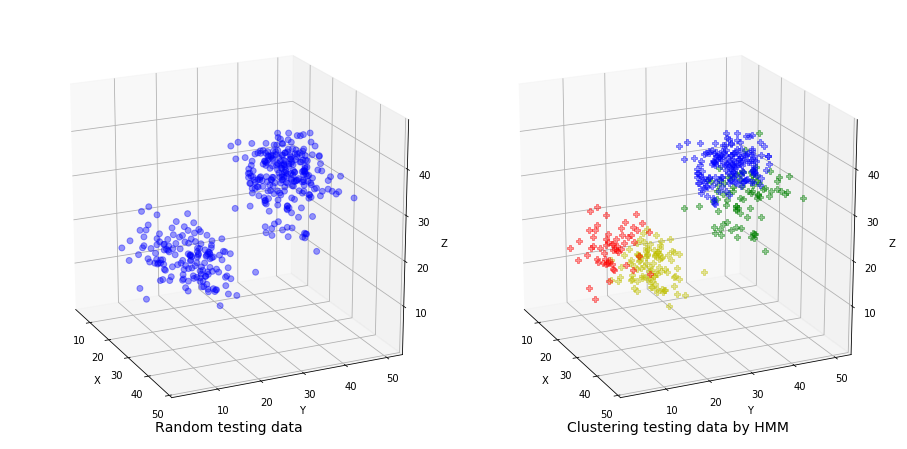

In [0]:
#@markdown - **Представление результата кластеризации тестовых данных методом СММ**
titles = ['Random testing data', 'Clustering testing data by HMM']
TAR = [target_test, target_pre]
DATA = [data_t.sample, data_t.sample]
fig = plt.figure(2, figsize=(16, 8))
fig.subplots_adjust(wspace=.01, hspace=.02)
for i, title, data_n, tar in zip([1, 2], titles, DATA, TAR):
    ax = fig.add_subplot(1, 2, i, projection='3d')
    if title == 'Random testing data':
        ax.scatter(data_n[:,0], data_n[:,1], data_n[:,2], c='b', s=35, alpha=0.4, marker='o')
    else:
        color=['b','r','g','y']
        for j in range(N):
            ax.scatter(data_n[j, 0], data_n[j, 1], data_n[j, 2], c=color[tar[j]], s=35, alpha=0.4, marker='P')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=20., azim=-25)
    ax.set_title(title, fontsize=14, y=0.01)
plt.show()